# **Case QuantumFinance - Disciplina NLP - Classificador de chamados**

**Atenção:**
- Leia com atenção o descritivo do trabalho e as orientações do template.
- O trabalho deve ser entregue respeitando a estrutura do arquivo de template em notebook "Template_Trabalho_Final_NLP.ipynb" e compactado no formato .zip. Apenas um arquivo no formato .ipynb deve ser entregue consolidando todo o trabalho.

***Participantes (RM - NOME):***<br>
358843 - Arthur Suematsu<br>
359302 - Eduardo Souza<br>
358496 - Gustavo Brezzi<br>
360191 - Wagner Sanches<br>

### **Crie um classificador de chamados aplicando técnicas de PLN**
---

A **QuantumFinance** tem um canal de atendimento via chat e precisar classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para alguma área especialista no assunto para uma melhor tratativa.​

1. Crie ao menos um modelo classificador de assuntos aplicando técnicas de NLP (PLN), Vetorização (n-grama + métrica) e modelo supervisionado, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do seu modelo.​

  O modelo precisar atingir um score na **métrica F1 Score superior a 75%**. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​

2. Utilizar ao menos uma aplicação de modelos com Embeddings usando Word2Vec e/ou LLM´s para criar o modelo classificador com os critérios do item 1. Não é necessário implementar aplicações usando serviços de API da OpenAI ou outros por exemplo.

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Composição da nota:​**

**50%** - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, aplicações de GenIA, organização do pipeline, etc.)​

**50%** - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com  a Métrica F1 Score). **Separar o pipeline completo do modelo campeão conforme template.​**

O trabalho poderá ser feito em grupo de 2 até 4 pessoas (mesmo grupo do Startup One) e trabalhos iguais serão descontado nota e passível de reprovação.

**[1] = ​https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv**

**[F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)** com average='weighted'

In [37]:
# CARREGANDO O DATA FRAME
import pandas as pd
#df = pd.read_csv('https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv', delimiter=';')

# Façam o download do arquivo e utilizem localmente durante os testes
df = pd.read_csv('tickets_reclamacoes_classificados.csv', delimiter = ';')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


Bom desenvolvimento!

### **Area de desenvolvimento e validações**

Faça aqui as demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)​

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

In [39]:
print(f"Dataset carregado: {df.shape[0]} registros e {df.shape[1]} colunas")
df.head()

Dataset carregado: 21072 registros e 4 colunas


id_reclamacao              data_abertura  \
0        3229299  2019-05-01T12:00:00-05:00   
1        3199379  2019-04-02T12:00:00-05:00   
2        3233499  2019-05-06T12:00:00-05:00   
3        3180294  2019-03-14T12:00:00-05:00   
4        3224980  2019-04-27T12:00:00-05:00   

                             categoria  \
0              Hipotecas / Empréstimos   
1  Cartão de crédito / Cartão pré-pago   
2  Cartão de crédito / Cartão pré-pago   
3  Cartão de crédito / Cartão pré-pago   
4           Serviços de conta bancária   

                                descricao_reclamacao  
0  Bom dia, meu nome é xxxx xxxx e agradeço se vo...  
1  Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...  
2  O cartão Chase foi relatado em xx/xx/2019. No ...  
3  Em xx/xx/2018, enquanto tentava reservar um ti...  
4  Meu neto me dê cheque por {$ 1600,00} Eu depos...

## **Análise Exploratória dos Dados (EDA)**

Verificação: vocabulário, nulos e validar se há termos representativos por categoria. 

A análise de **frequência das classes**, **comprimento médio** e **n-grams mais frequentes** confirma se bigramas ajudam a capturar contexto (ex: "cartão bloqueado", "empréstimo negado"). 

Detectar **palavras de domínio** que podem virar stopwords personalizadas (ex: "reclamação", "cliente")

In [40]:
# Verificação de valores nulos
print("=== Valores Nulos ===")
print(df.isnull().sum())
print(f"\nTotal de nulos: {df.isnull().sum().sum()}")

# Verificação de duplicados
print(f"\n=== Duplicados ===")
print(f"Registros duplicados: {df.duplicated().sum()}")

# Verificação de textos vazios
print(f"\n=== Textos Vazios ===")
textos_vazios = df['descricao_reclamacao'].str.strip().str.len() == 0
print(f"Textos vazios: {textos_vazios.sum()}")

=== Valores Nulos ===
id_reclamacao           0
data_abertura           0
categoria               0
descricao_reclamacao    0
dtype: int64

Total de nulos: 0

=== Duplicados ===
Registros duplicados: 0

=== Textos Vazios ===
Textos vazios: 0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Contagem e percentual de cada categoria
print("=== Distribuição de Categorias ===")
categoria_counts = df['categoria'].value_counts()
categoria_percent = df['categoria'].value_counts(normalize=True) * 100

distribuicao = pd.DataFrame({
    'Quantidade': categoria_counts,
    'Percentual (%)': categoria_percent.round(2)
})
print(distribuicao)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
sns.countplot(data=df, y='categoria', order=categoria_counts.index, ax=axes[0])
axes[0].set_title('Distribuição de Categorias', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade')
axes[0].set_ylabel('Categoria')

# Gráfico de pizza
axes[1].pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporção de Categorias', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAnálise: As classes apresentam leve desbalanceamento — variando de cerca de 10% a 24% dos registros —, mas ainda mantêm proporções suficientemente próximas para um treinamento supervisionado estável.")



=== Distribuição de Categorias ===
                                     Quantidade  Percentual (%)
categoria                                                      
Serviços de conta bancária                 5161           24.49
Cartão de crédito / Cartão pré-pago        5006           23.76
Roubo / Relatório de disputa               4822           22.88
Hipotecas / Empréstimos                    3850           18.27
Outros                                     2233           10.60



Análise: As classes apresentam leve desbalanceamento — variando de cerca de 10% a 24% dos registros —, mas ainda mantêm proporções suficientemente próximas para um treinamento supervisionado estável.


In [ ]:
# Análise de comprimento em caracteres e palavras
df['num_caracteres'] = df['descricao_reclamacao'].str.len()
df['num_palavras'] = df['descricao_reclamacao'].str.split().str.len()

print("=== Estatísticas de Comprimento dos Textos ===")
print("\nCaracteres:")
print(df['num_caracteres'].describe())
print("\nPalavras:")
print(df['num_palavras'].describe())

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de caracteres
axes[0].hist(df['num_caracteres'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição do Comprimento em Caracteres', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Caracteres')
axes[0].set_ylabel('Frequência')
axes[0].axvline(df['num_caracteres'].mean(), color='red', linestyle='--', label=f'Média: {df["num_caracteres"].mean():.0f}')
axes[0].legend()

# Histograma de palavras
axes[1].hist(df['num_palavras'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribuição do Comprimento em Palavras', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Palavras')
axes[1].set_ylabel('Frequência')
axes[1].axvline(df['num_palavras'].mean(), color='red', linestyle='--', label=f'Média: {df["num_palavras"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✓ Análise: Os textos são longos (média ~250 palavras), contendo narrativas completas. O pré-processamento deve reduzir ruído e redundância sem eliminar palavras relevantes do domínio financeiro.")

=== Estatísticas de Comprimento dos Textos ===

Caracteres:
count    21072.000000
mean      1465.305429
std       1585.890511
min          9.000000
25%        560.000000
50%       1041.000000
75%       1843.250000
max      33897.000000
Name: num_caracteres, dtype: float64

Palavras:
count    21072.000000
mean       247.782413
std        265.400668
min          2.000000
25%         95.000000
50%        177.000000
75%        312.250000
max       5536.000000
Name: num_palavras, dtype: float64



✓ Análise: Os textos são longos (média ~250 palavras), contendo narrativas completas. O pré-processamento deve reduzir ruído e redundância sem eliminar palavras relevantes do domínio financeiro.


In [7]:

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Download de recursos necessários do NLTK
nltk.download('stopwords', quiet=True)
nltk.download('rslp', quiet=True)
nltk.download('punkt', quiet=True)


# Stopwords customizadas baseadas na EDA
custom_stopwords = [
    'cliente', 'favor', 'gostaria', 'solicito', 'peço', 'preciso',
    'reclamação', 'reclamações', 'problema', 'problemas',
    'situação', 'situações', 'caso', 'casos',
    'informação', 'informações', 'dados', 'dado',
    'atendimento', 'atendimentos', 'contato', 'contatos',
    'serviço', 'serviços'
]

# Adicionar stopwords em inglês leve
stopwords_en_light = ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']

# Combinar todas as stopwords em uma LISTA
stop_words_pt = list(stopwords.words('portuguese')) + custom_stopwords + stopwords_en_light

# Converter para lista única (remover duplicatas)
stop_words_pt = list(set(stop_words_pt))
# Função para extrair n-gramas mais frequentes
def get_top_ngrams(corpus, n=1, top=20, use_stopwords=False):
    """
    Extrai os n-gramas mais frequentes do corpus
    
    Parâmetros:
    - corpus: lista de textos
    - n: tamanho do n-grama (1=unigrama, 2=bigrama)
    - top: quantidade de n-gramas a retornar
    - use_stopwords: se True, remove stopwords
    """


    stop_words = stop_words_pt if use_stopwords else None
    
    vec = CountVectorizer(
        ngram_range=(n, n),
        max_features=top,
        stop_words=stop_words,
        lowercase=True
    ).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return pd.DataFrame(words_freq, columns=['ngrama', 'frequencia'])

# Extrair unigramas e bigramas
print("=== Top 20 Unigramas (SEM remoção de stopwords) ===")
top_unigrams = get_top_ngrams(df['descricao_reclamacao'], n=1, top=20, use_stopwords=False)
print(top_unigrams)

print("\n=== Top 20 Unigramas (COM remoção de stopwords) ===")
top_unigrams_clean = get_top_ngrams(df['descricao_reclamacao'], n=1, top=20, use_stopwords=True)
print(top_unigrams_clean)

print("\n=== Top 20 Bigramas (COM remoção de stopwords) ===")
top_bigrams = get_top_ngrams(df['descricao_reclamacao'], n=2, top=20, use_stopwords=True)
print(top_bigrams)

=== Top 20 Unigramas (SEM remoção de stopwords) ===
   ngrama  frequencia
0      de      235401
1    xxxx      225465
2     que      182265
3    para      102172
4     não       86254
5      em       83908
6      xx       76729
7   chase       67876
8      eu       64006
9      um       63753
10    uma       59844
11    com       56620
12     do       51296
13   eles       51231
14     me       48780
15    meu       46375
16  minha       44026
17  conta       42970
18    por       41751
19     no       40826

=== Top 20 Unigramas (COM remoção de stopwords) ===
        ngrama  frequencia
0         xxxx      225465
1           xx       76729
2        chase       67876
3        conta       42970
4      crédito       31317
5           00       30252
6       cartão       25411
7    pagamento       15578
8     dinheiro       13783
9        disse       13326
10      recebi       12193
11       sobre       12143
12        bank       11672
13       banco       11631
14    disseram       10465
1

In [8]:
# IMPLEMENTAÇÃO: Função de limpeza de tokens mascarados
import re

def clean_text(text):
    """
    Remove tokens mascarados específicos do domínio financeiro
    
    Parâmetros:
    - text: texto a ser limpo
    
    Retorna:
    - texto limpo sem tokens mascarados
    """
    if not isinstance(text, str):
        return ""
    
    # Converter para lowercase
    text = text.lower()
    
    # Remover tokens mascarados
    text = re.sub(r'\b[xX]{2,}\b', '', text)  # Remove xxxx, xx
    text = re.sub(r'\b\d{2,}\b', '', text)     # Remove 00, 2020, etc.
    
    # Limpar espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Teste da função
texto_teste = "Eu xxxx meu cartão xx foi bloqueado 00 e preciso de ajuda"
print("Teste da função:")
print(f"Original: {texto_teste}")
print(f"Limpo: {clean_text(texto_teste)}")

Teste da função:
Original: Eu xxxx meu cartão xx foi bloqueado 00 e preciso de ajuda
Limpo: eu meu cartão foi bloqueado e preciso de ajuda


In [9]:
# APLICAÇÃO: Limpeza de tokens mascarados no dataset
print("=== APLICAÇÃO: Limpeza de Tokens Mascarados ===")

# Aplicar limpeza
df['descricao_limpa'] = df['descricao_reclamacao'].apply(clean_text)

# Comparar antes e depois
print("Exemplo de limpeza:")
exemplo_idx = 0
print(f"ANTES: {df['descricao_reclamacao'].iloc[exemplo_idx]}")
print(f"DEPOIS: {df['descricao_limpa'].iloc[exemplo_idx]}")

# Verificar redução de tokens problemáticos
print(f"\nRedução de tokens mascarados:")
print(f"- 'xxxx' antes: {df['descricao_reclamacao'].str.count('xxxx').sum()}")
print(f"- 'xxxx' depois: {df['descricao_limpa'].str.count('xxxx').sum()}")
print(f"- 'xx' antes: {df['descricao_reclamacao'].str.count('xx').sum()}")
print(f"- 'xx' depois: {df['descricao_limpa'].str.count('xx').sum()}")

=== APLICAÇÃO: Limpeza de Tokens Mascarados ===
Exemplo de limpeza:
ANTES: Bom dia, meu nome é xxxx xxxx e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário.
Em 2018, escrevi para Chase solicitar verificação da dívida e o que eles me enviaram uma declaração que não é aceitável. Estou pedindo ao banco que valide a dívida. Em vez disso, recebi e -mails todos os meses, tentando coletar uma dívida.
Tenho o direito de conhecer essas informações como consumidor.

Conta do Chase # xxxx xxxx xxxx xxxx Obrigado antecipadamente pela sua ajuda.
DEPOIS: bom dia, meu nome é e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário. em , escrevi para chase solicitar verificação da dívida e o que eles me enviaram uma declaração que não é aceitável. estou pedindo ao banco que valide a dívida. em vez disso, recebi e -mails todos os meses, tentando coletar uma dívida. tenho o direito de conhecer essas informações como consumidor. conta 

In [10]:
# IMPACTO: Análise de n-gramas após limpeza
print("=== IMPACTO: N-gramas Após Limpeza ===")

# Re-analisar n-gramas com texto limpo
print("Top 20 Unigramas APÓS limpeza de tokens mascarados:")
top_unigrams_clean = get_top_ngrams(df['descricao_limpa'], n=1, top=20, use_stopwords=True)
print(top_unigrams_clean)

print("Top 20 Bigramas APÓS limpeza de tokens mascarados:")
top_bigrams = get_top_ngrams(df['descricao_limpa'], n=1, top=20, use_stopwords=True)
print(top_bigrams)

print("\nComparação:")
print("ANTES: Tokens mascarados dominavam (xxxx, xx)")
print("DEPOIS: Termos de domínio aparecem (chase, bank, crédito, cartão)")
print("\nJustificativa: Durante a etapa de normalização, foram removidos tokens mascarados (como “xxxx”, “xx”, “00”), comuns em bases financeiras para anonimização de dados.")
print("\n A remoção de mascaramentos garante que o modelo aprenda padrões semânticos reais (como “crédito”, “cartão”, “empréstimo”) em vez de ruído gerado por anonimizações.")

=== IMPACTO: N-gramas Após Limpeza ===
Top 20 Unigramas APÓS limpeza de tokens mascarados:
        ngrama  frequencia
0        chase       67876
1        conta       42970
2      crédito       31317
3       cartão       25411
4    pagamento       15578
5     dinheiro       13783
6        disse       13326
7       recebi       12193
8        sobre       12143
9         bank       11672
10       banco       11631
11    disseram       10465
12       nunca       10099
13      porque        9794
14       então        9733
15      liguei        9342
16  empréstimo        9232
17       fazer        9163
18       havia        8585
19        dias        8541
Top 20 Bigramas APÓS limpeza de tokens mascarados:
        ngrama  frequencia
0        chase       67876
1        conta       42970
2      crédito       31317
3       cartão       25411
4    pagamento       15578
5     dinheiro       13783
6        disse       13326
7       recebi       12193
8        sobre       12143
9         bank       

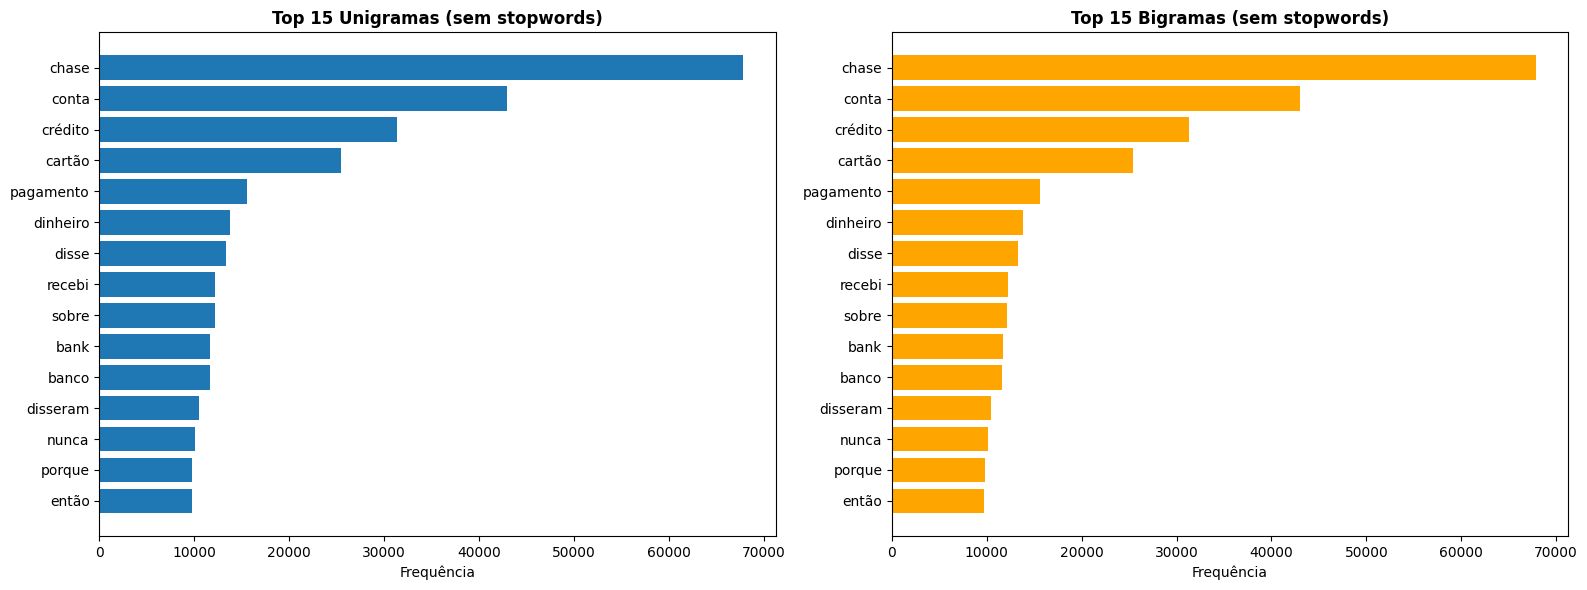


✓ Decisão: Bigramas capturam contextos importantes do domínio financeiro (ex: 'conta corrente', 'cartão crédito').
  Utilizaremos ngram_range=(1,2) nos experimentos com TF-IDF.


In [11]:
# Visualização dos n-gramas mais frequentes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Unigramas
axes[0].barh(top_unigrams_clean['ngrama'][:15][::-1], top_unigrams_clean['frequencia'][:15][::-1])
axes[0].set_title('Top 15 Unigramas (sem stopwords)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Frequência')

# Bigramas
axes[1].barh(top_bigrams['ngrama'][:15][::-1], top_bigrams['frequencia'][:15][::-1], color='orange')
axes[1].set_title('Top 15 Bigramas (sem stopwords)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frequência')

plt.tight_layout()
plt.show()

print("\n✓ Decisão: Bigramas capturam contextos importantes do domínio financeiro (ex: 'conta corrente', 'cartão crédito').")
print("  Utilizaremos ngram_range=(1,2) nos experimentos com TF-IDF.")

In [12]:
# Nuvem de palavras para cada categoria 
from wordcloud import WordCloud


categorias = df['categoria'].unique()
stop_words_pt = set(stopwords.words('portuguese'))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, categoria in enumerate(categorias):
    texto = ' '.join(df[df['categoria'] == categoria]['descricao_limpa'])
    
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        stopwords=stop_words_pt,
        max_words=50,
        colormap='viridis'
    ).generate(texto)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(categoria, fontsize=12, fontweight='bold')
    axes[idx].axis('off')

# Remover subplot extra se houver
if len(categorias) < 6:
    for idx in range(len(categorias), 6):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("✓ As nuvens de palavras evidenciam termos característicos de cada categoria.")


✓ As nuvens de palavras evidenciam termos característicos de cada categoria.


In [13]:
import spacy
try:
    nlp = spacy.load('pt_core_news_sm')
    print("✓ Modelo spaCy carregado!")
except:
    print("⚠ Modelo spaCy não encontrado. Execute: python -m spacy download pt_core_news_sm")
    nlp = None

✓ Modelo spaCy carregado!


In [14]:
# IMPLEMENTAÇÃO: Funções de lematização

def lemmatize_text(texts, keep_pos=['NOUN', 'VERB', 'ADJ']):
    """
    Lematização usando spaCy (pt_core_news_sm), mantendo apenas substantivos, verbos e adjetivos.
    Remove stopwords durante o processo.
    Otimizada com nlp.pipe() para processar listas de textos em lote.
    """
    if nlp is None:
        return texts
    
    # Se for uma única string, processa normalmente
    if isinstance(texts, str):
        doc = nlp(texts)
        lemmas = [token.lemma_ for token in doc
                  if token.pos_ in keep_pos
                  and token.lemma_ not in stop_words_pt
                  and len(token.lemma_) > 2]
        return ' '.join(lemmas)

    # Se for uma lista ou Série (processamento em lote)
    lemmatized_texts = []
    for doc in nlp.pipe(texts, batch_size=100, n_process=2):
        lemmas = [token.lemma_ for token in doc
                  if token.pos_ in keep_pos
                  and token.lemma_ not in stop_words_pt
                  and len(token.lemma_) > 2]
        lemmatized_texts.append(' '.join(lemmas))
    return lemmatized_texts

# Teste da função
texto_teste = "Eu gostaria de solicitar o desbloqueio do meu cartão de crédito que foi bloqueado ontem!"
print("Teste de lematização:")
print(f"Original: {texto_teste}")
print(f"Limpo: {clean_text(texto_teste)}")
print(f"Lematizado: {lemmatize_text(clean_text(texto_teste))}")

Teste de lematização:
Original: Eu gostaria de solicitar o desbloqueio do meu cartão de crédito que foi bloqueado ontem!
Limpo: eu gostaria de solicitar o desbloqueio do meu cartão de crédito que foi bloqueado ontem!
Lematizado: gostar solicitar desbloqueio cartão crédito bloquear


In [15]:
def preprocess_text(text, use_lemmatization=True):
    """
    Pipeline completo de pré-processamento
    """
    # Limpeza básica
    text = clean_text(text)
    
    # Remoção de stopwords (se não usar lematização)
    if not use_lemmatization:
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words_pt and len(word) > 2]
        text = ' '.join(tokens)
    else:
        # Lematização (já remove stopwords)
        text = lemmatize_text(text)
    
    return text

#### Comparação entre stemização e lematização

In [16]:
from nltk import RSLPStemmer

stemmer = RSLPStemmer()

def stem_text(text):
    """Aplica stemização RSLP"""
    tokens = clean_text(text).split()
    stemmed = [stemmer.stem(word) for word in tokens if word not in stop_words_pt and len(word) > 2]
    return ' '.join(stemmed)

# Exemplo comparativo
texto_teste = "Os clientes solicitaram o desbloqueio dos cartões de crédito que foram bloqueados."
print("=== Comparação Stemização vs Lematização ===")
print(f"\nTexto original:\n{texto_teste}")
print(f"\nCom Stemização (RSLP):\n{stem_text(texto_teste)}")
print(f"\nCom Lematização (spaCy):\n{preprocess_text(texto_teste)}")

print("\n✓ Decisão: A lematização preserva melhor o sentido das palavras, sendo mais adequada para este domínio.")
print("  Stemização pode ser útil para reduzir ainda mais o vocabulário, mas pode perder nuances importantes.")


=== Comparação Stemização vs Lematização ===

Texto original:
Os clientes solicitaram o desbloqueio dos cartões de crédito que foram bloqueados.

Com Stemização (RSLP):
client solicit desbloquei cart crédit bloqueados.

Com Lematização (spaCy):
cliente solicitarar desbloqueio cartão crédito bloquear

✓ Decisão: A lematização preserva melhor o sentido das palavras, sendo mais adequada para este domínio.
  Stemização pode ser útil para reduzir ainda mais o vocabulário, mas pode perder nuances importantes.


In [ ]:
# IMPLEMENTAÇÃO: Lematização otimizada para performance
import spacy

# 1) Carregar spaCy otimizado
try:
    nlp = spacy.load("pt_core_news_sm", disable=["parser", "ner"])  # só POS + lemmatização
    nlp.max_length = 2_000_000  # folga para textos maiores
    print("✓ Modelo spaCy otimizado carregado!")
except:
    print("⚠ Modelo spaCy não encontrado. Execute: python -m spacy download pt_core_news_sm")
    nlp = None

# 2) Lematização em lote otimizada
def lemmatize_text_batch(texts, keep_pos=("NOUN", "VERB", "ADJ"), batch_size=300, n_process=-1):
    """
    Lematização otimizada para grandes volumes de texto
    """
    if nlp is None:
        return texts

    sw = stop_words_pt if isinstance(stop_words_pt, set) else set(stop_words_pt)
    single = isinstance(texts, str)
    if single:
        texts = [texts]

    out = []
    with nlp.select_pipes(disable=[]):  # já desativamos parser/ner no load
        for doc in nlp.pipe(texts, batch_size=batch_size, n_process=n_process):
            lemmas = [
                t.lemma_ for t in doc
                if t.pos_ in keep_pos and len(t.lemma_) > 2 and t.lemma_ not in sw
            ]
            out.append(" ".join(lemmas))

    return out[0] if single else out

# 3) Pré-processador vetorizado
def preprocess_text_series(texts, use_lemmatization=True):
    """
    Pré-processamento otimizado para Series do pandas
    """
    texts = texts.fillna("").astype(str)
    texts = texts.map(clean_text)  
    
    if not use_lemmatization:
        sw = stop_words_pt if isinstance(stop_words_pt, set) else set(stop_words_pt)
        return texts.map(lambda t: " ".join(w for w in t.split() if len(w) > 2 and w not in sw))
    
    return pd.Series(lemmatize_text_batch(texts, batch_size=300, n_process=-1), index=texts.index)

✓ Modelo spaCy otimizado carregado!


In [18]:
# APLICAÇÃO: Pré-processamento otimizado
print("=== APLICAÇÃO: Pré-processamento Otimizado ===")
print("Aplicando lematização otimizada...")

# Aplicar pré-processamento otimizado
df['descricao_processada'] = preprocess_text_series(df['descricao_limpa'], use_lemmatization=True)

# Comparar
print("\nExemplo:")
exemplo_idx = 0
print(f"ORIGINAL: {df['descricao_reclamacao'].iloc[exemplo_idx][:150]}...")
print(f"\nPROCESSADO: {df['descricao_processada'].iloc[exemplo_idx][:150]}...")

print("\n✓ Pré-processamento otimizado concluído!")
print("✓ Justificativa: Otimizações de performance (batch processing, paralelização) reduzem tempo de execução")

=== APLICAÇÃO: Pré-processamento Otimizado ===
Aplicando lematização otimizada...

Exemplo:
ORIGINAL: Bom dia, meu nome é xxxx xxxx e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário.
Em 2018, escrevi para Chase s...

PROCESSADO: bom dia nome agradeço puder ajudar acabar serviço membro cartão bancário escrevi chase solicitar verificação dívida enviar declaração aceitável pedir ...

✓ Pré-processamento otimizado concluído!
✓ Justificativa: Otimizações de performance (batch processing, paralelização) reduzem tempo de execução


In [19]:
df.head()

id_reclamacao              data_abertura  \
0        3229299  2019-05-01T12:00:00-05:00   
1        3199379  2019-04-02T12:00:00-05:00   
2        3233499  2019-05-06T12:00:00-05:00   
3        3180294  2019-03-14T12:00:00-05:00   
4        3224980  2019-04-27T12:00:00-05:00   

                             categoria  \
0              Hipotecas / Empréstimos   
1  Cartão de crédito / Cartão pré-pago   
2  Cartão de crédito / Cartão pré-pago   
3  Cartão de crédito / Cartão pré-pago   
4           Serviços de conta bancária   

                                descricao_reclamacao  num_caracteres  \
0  Bom dia, meu nome é xxxx xxxx e agradeço se vo...             505   
1  Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...             350   
2  O cartão Chase foi relatado em xx/xx/2019. No ...             228   
3  Em xx/xx/2018, enquanto tentava reservar um ti...            1577   
4  Meu neto me dê cheque por {$ 1600,00} Eu depos...             607   

   num_palavras                                    descricao_limpa  \
0            88  bom dia, meu nome é e agradeço se você puder m...   
1            58  atualizei meu cartão em // e fui informado pel...   
2            33  o cartão chase foi relatado em //. no entanto,...   
3           276  em //, enquanto tentava reservar um ticket , m...   
4           108  meu neto me dê cheque por {$ ,} eu depositei -...   

                                descricao_processada  
0  bom dia nome agradeço puder ajudar acabar serv...  
1  atualizei cartão informar agente fazer atualiz...  
2  cartão relatar //. entanto pedido fraudulento ...  
3  tentar reservar ticket deparar oferta aplicar ...  
4  neto cheque depositei conta chase fundo limpar...

### Separação Treino/Teste (75%/25%)

**random_state=42** e split **estratificado** para manter a proporção das classes.

In [20]:
# Separação estratificada dos dados
from sklearn.model_selection import train_test_split


X = df['descricao_reclamacao']
y = df['categoria']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribuição de classes no treino:")
print(y_train.value_counts())

Conjunto de Treino: 15804 amostras (75.0%)
Conjunto de Teste: 5268 amostras (25.0%)

Distribuição de classes no treino:
categoria
Serviços de conta bancária             3871
Cartão de crédito / Cartão pré-pago    3754
Roubo / Relatório de disputa           3616
Hipotecas / Empréstimos                2888
Outros                                 1675
Name: count, dtype: int64


## Experimento 1 TF_IDF + Regressão Logística 

**Justificativa da Vetorização:**
- **TF-IDF (1-2 gram)**: captura termos curtos e combina frequência local (TF) com importância global (IDF)
- **ngram_range=(1,2)**: unigramas + bigramas capturam expressões do domínio
- **sublinear_tf**: aplica log(TF) para suavizar impacto de termos muito frequentes
- **min_df**: filtra termos que aparecem em poucos documentos (ruído)

In [21]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


print("="*80)
print("EXPERIMENTO 1: TF-IDF + REGRESSÃO LOGÍSTICA")
print("="*80)

# Pré-processar os textos (aplicar lematização)
print("\n[1/5] Pré-processando textos...")
X_train_processed = preprocess_text_series(X_train, use_lemmatization=True)
X_test_processed = preprocess_text_series(X_test, use_lemmatization=True)
print(f"✓ Processados {len(X_train_processed)} textos de treino e {len(X_test_processed)} de teste")

# Definir o pipeline
print("\n[2/5] Configurando pipeline e Grid Search...")
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Grid de hiperparâmetros
param_grid_lr = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_df': [1, 2, 3],
    'clf__C': [0.5, 1, 2, 4]
}

# GridSearchCV com 5-fold estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Treinamento
print("\n[3/5] Treinando modelo com GridSearchCV (5-fold)...")
start_time = time.time()
grid_search_lr.fit(X_train_processed, y_train)
train_time = time.time() - start_time

print(f"✓ Treinamento concluído em {train_time:.2f} segundos")

# Melhores hiperparâmetros
print("\n[4/5] Melhores hiperparâmetros encontrados:")
for param, value in grid_search_lr.best_params_.items():
    print(f"  - {param}: {value}")

# Avaliação no conjunto de teste
print("\n[5/5] Avaliação no conjunto de teste...")
y_pred_lr = grid_search_lr.predict(X_test_processed)
f1_test_lr = f1_score(y_test, y_pred_lr, average='weighted')
accuracy_test_lr = accuracy_score(y_test, y_pred_lr)

print(f"\nResultados no Teste:")
print(f"  - F1-Score (weighted): {f1_test_lr:.4f}")
print(f"  - Accuracy: {accuracy_test_lr:.4f}")
print(f"  - Tempo de treinamento: {train_time:.2f}s")

# Armazenar resultados
results_exp1 = {
    'model': 'TF-IDF + Regressão Logística',
    'best_params': grid_search_lr.best_params_,
    'f1_cv': grid_search_lr.best_score_,
    'f1_test': f1_test_lr,
    'accuracy_test': accuracy_test_lr,
    'train_time': train_time,
    'grid_search': grid_search_lr
}

EXPERIMENTO 1: TF-IDF + REGRESSÃO LOGÍSTICA

[1/5] Pré-processando textos...
✓ Processados 15804 textos de treino e 5268 de teste

[2/5] Configurando pipeline e Grid Search...

[3/5] Treinando modelo com GridSearchCV (5-fold)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✓ Treinamento concluído em 994.20 segundos

[4/5] Melhores hiperparâmetros encontrados:
  - clf__C: 1
  - tfidf__min_df: 3
  - tfidf__ngram_range: (1, 1)
  - tfidf__sublinear_tf: False

[5/5] Avaliação no conjunto de teste...

Resultados no Teste:
  - F1-Score (weighted): 0.9132
  - Accuracy: 0.9134
  - Tempo de treinamento: 994.20s



RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 1
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.92      0.93      0.92      1252
            Hipotecas / Empréstimos       0.92      0.93      0.92       962
                             Outros       0.91      0.84      0.87       558
       Roubo / Relatório de disputa       0.90      0.89      0.90      1206
         Serviços de conta bancária       0.92      0.94      0.93      1290

                           accuracy                           0.91      5268
                          macro avg       0.91      0.90      0.91      5268
                       weighted avg       0.91      0.91      0.91      5268



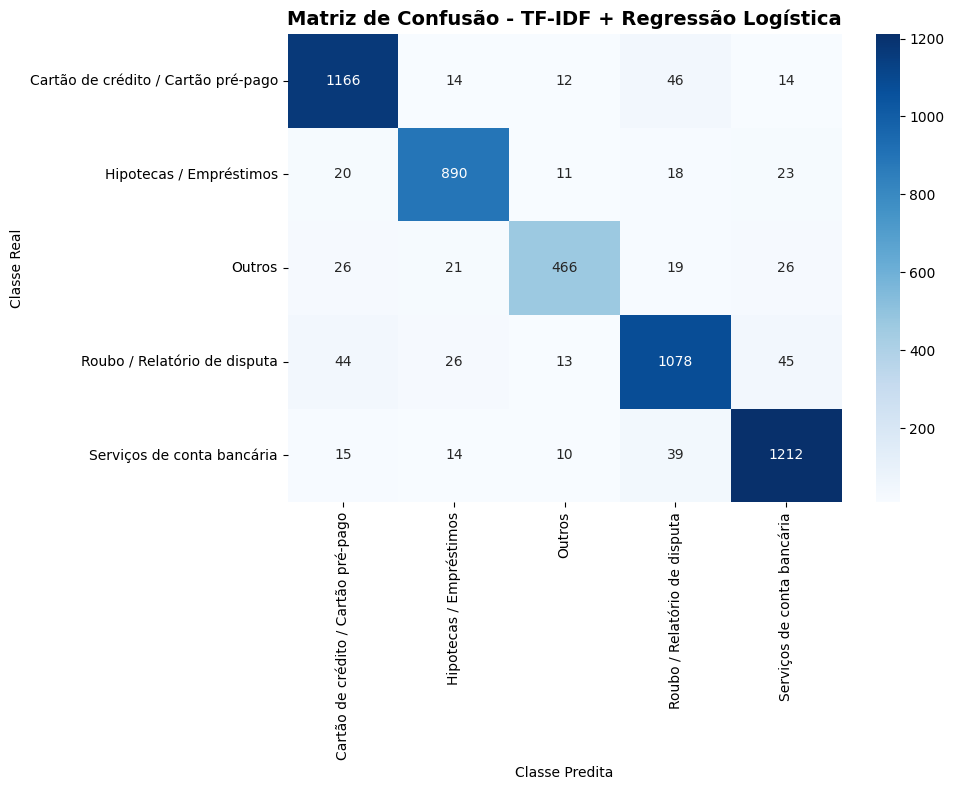

In [22]:
# Relatório de classificação detalhado
from sklearn.metrics import classification_report, confusion_matrix


print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 1")
print("="*80)
print(classification_report(y_test, y_pred_lr))

# Matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_lr.classes_, 
            yticklabels=grid_search_lr.classes_,
            ax=ax)
ax.set_title('Matriz de Confusão - TF-IDF + Regressão Logística', fontsize=14, fontweight='bold')
ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')
plt.tight_layout()
plt.show()

In [23]:
# Análise das features mais importantes por classe
print("\n=== Features mais importantes por classe (Top 10) ===\n")

# Obter o vetorizador e o classificador do melhor modelo
best_model_lr = grid_search_lr.best_estimator_
vectorizer = best_model_lr.named_steps['tfidf']
classifier = best_model_lr.named_steps['clf']

# Obter nomes das features
feature_names = vectorizer.get_feature_names_out()

# Para cada classe, mostrar as features com maiores coeficientes
for idx, classe in enumerate(classifier.classes_):
    coefs = classifier.coef_[idx]
    top_indices = np.argsort(coefs)[-10:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_coefs = [coefs[i] for i in top_indices]
    
    print(f"{classe}:")
    for feature, coef in zip(top_features, top_coefs):
        print(f"  {feature}: {coef:.4f}")
    print()


=== Features mais importantes por classe (Top 10) ===

Cartão de crédito / Cartão pré-pago:
  crédito: 15.1312
  cartão: 10.0057
  relatório: 6.2061
  consulta: 3.1445
  creditar: 2.6633
  relatar: 2.4023
  dívida: 2.0722
  pergunta: 2.0087
  pontuação: 1.9000
  card: 1.8423

Hipotecas / Empréstimos:
  empréstimo: 11.8292
  hipoteca: 8.4260
  casa: 5.3087
  propriedade: 3.5610
  modificação: 3.3259
  hipotecário: 3.2565
  documento: 2.9606
  dívida: 2.2686
  venda: 2.2607
  imposto: 2.1899

Outros:
  pagamento: 18.9880
  saldo: 2.7261
  mês: 2.1084
  atrasar: 2.0981
  declaração: 2.0266
  mensal: 1.6217
  atraso: 1.5856
  auto: 1.4842
  arrendamento: 1.3446
  aplicar: 1.2858

Roubo / Relatório de disputa:
  cobrança: 9.5050
  acusação: 8.6600
  cobrar: 6.4378
  disputa: 5.6825
  transação: 5.1083
  taxa: 4.8447
  carga: 4.5684
  comerciante: 4.1184
  compra: 3.6223
  reivindicação: 3.4459

Serviços de conta bancária:
  conta: 11.6094
  cheque: 6.2210
  banco: 5.0655
  dinheiro: 4.6819

---
### **Experimento 2: TF-IDF + Linear SVM**

**Justificativa do Modelo:**
- **LinearSVC** é especialmente eficiente com dados de alta dimensionalidade (vetores TF-IDF)
- Busca maximizar a margem entre classes, sendo robusto para textos esparsos
- Compararemos com Regressão Logística para identificar qual captura melhor os padrões

In [24]:
from sklearn.svm import LinearSVC


print("="*80)
print("EXPERIMENTO 2: TF-IDF + LINEAR SVM")
print("="*80)

# Pipeline (textos já foram pré-processados no Exp. 1)
print("\n[1/4] Configurando pipeline e Grid Search...")
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(max_iter=2000, random_state=42))
])

# Grid de hiperparâmetros
param_grid_svm = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_df': [1, 2, 3],
    'clf__C': [0.5, 1, 2, 4],
    'clf__loss': ['hinge', 'squared_hinge']
}

# GridSearchCV
grid_search_svm = GridSearchCV(
    pipeline_svm,
    param_grid_svm,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Treinamento
print("\n[2/4] Treinando modelo com GridSearchCV (5-fold)...")
start_time = time.time()
grid_search_svm.fit(X_train_processed, y_train)
train_time_svm = time.time() - start_time

print(f"✓ Treinamento concluído em {train_time_svm:.2f} segundos")

# Melhores hiperparâmetros
print("\n[3/4] Melhores hiperparâmetros encontrados:")
for param, value in grid_search_svm.best_params_.items():
    print(f"  - {param}: {value}")

# Avaliação no conjunto de teste
print("\n[4/4] Avaliação no conjunto de teste...")
y_pred_svm = grid_search_svm.predict(X_test_processed)
f1_test_svm = f1_score(y_test, y_pred_svm, average='weighted')
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)

print(f"\nResultados no Teste:")
print(f"  - F1-Score (weighted): {f1_test_svm:.4f}")
print(f"  - Accuracy: {accuracy_test_svm:.4f}")
print(f"  - Tempo de treinamento: {train_time_svm:.2f}s")

# Armazenar resultados
results_exp2 = {
    'model': 'TF-IDF + Linear SVM',
    'best_params': grid_search_svm.best_params_,
    'f1_cv': grid_search_svm.best_score_,
    'f1_test': f1_test_svm,
    'accuracy_test': accuracy_test_svm,
    'train_time': train_time_svm,
    'grid_search': grid_search_svm
}


EXPERIMENTO 2: TF-IDF + LINEAR SVM

[1/4] Configurando pipeline e Grid Search...

[2/4] Treinando modelo com GridSearchCV (5-fold)...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
✓ Treinamento concluído em 897.37 segundos

[3/4] Melhores hiperparâmetros encontrados:
  - clf__C: 0.5
  - clf__loss: squared_hinge
  - tfidf__min_df: 1
  - tfidf__ngram_range: (1, 2)
  - tfidf__sublinear_tf: False

[4/4] Avaliação no conjunto de teste...

Resultados no Teste:
  - F1-Score (weighted): 0.9102
  - Accuracy: 0.9104
  - Tempo de treinamento: 897.37s


In [25]:
# Relatório de classificação
print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 2")
print("="*80)
print(classification_report(y_test, y_pred_svm))

# Matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=grid_search_svm.classes_, 
            yticklabels=grid_search_svm.classes_,
            ax=ax)
ax.set_title('Matriz de Confusão - TF-IDF + Linear SVM', fontsize=14, fontweight='bold')
ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')
plt.tight_layout()
plt.show()


RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 2
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.91      0.93      0.92      1252
            Hipotecas / Empréstimos       0.94      0.91      0.92       962
                             Outros       0.90      0.86      0.88       558
       Roubo / Relatório de disputa       0.90      0.88      0.89      1206
         Serviços de conta bancária       0.91      0.94      0.93      1290

                           accuracy                           0.91      5268
                          macro avg       0.91      0.90      0.91      5268
                       weighted avg       0.91      0.91      0.91      5268



---
### **Experimento 3: Sentence Embedding (Transformer) + Regressão Logística**

**Justificativa da Vetorização:**
- **Sentence Embeddings**: extrai vetor denso representando semântica completa da frase
- Utiliza **Transformer multilíngue** (modelo leve pré-treinado)
- **Sem fine-tuning**: apenas extração de features
- Captura sinonímia e contexto semântico que TF-IDF não consegue

**Modelo:** Mantemos Regressão Logística pela simplicidade e boa performance com embeddings densos.


In [30]:
from sentence_transformers import SentenceTransformer


print("="*80)
print("EXPERIMENTO 3: SENTENCE EMBEDDING + REGRESSÃO LOGÍSTICA")
print("="*80)

# Carregar modelo de Sentence Transformer
print("\n[1/5] Carregando modelo de embeddings...")
print("  Modelo: paraphrase-multilingual-MiniLM-L12-v2")
embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print("✓ Modelo carregado com sucesso!")

# Gerar embeddings (usando textos originais, não pré-processados)
# Transformers já lidam bem com o texto bruto
print("\n[2/5] Gerando embeddings para conjunto de treino...")
start_emb = time.time()
X_train_embeddings = embedding_model.encode(X_train.tolist(), show_progress_bar=True)
print(f"✓ Embeddings de treino gerados em {time.time() - start_emb:.2f}s")
print(f"  Shape: {X_train_embeddings.shape}")

print("\n[3/5] Gerando embeddings para conjunto de teste...")
X_test_embeddings = embedding_model.encode(X_test.tolist(), show_progress_bar=True)
print(f"✓ Embeddings de teste gerados")
print(f"  Shape: {X_test_embeddings.shape}")


EXPERIMENTO 3: SENTENCE EMBEDDING + REGRESSÃO LOGÍSTICA

[1/5] Carregando modelo de embeddings...
  Modelo: paraphrase-multilingual-MiniLM-L12-v2


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

c:\Users\eduhs\anaconda3\envs\dl\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\eduhs\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✓ Modelo carregado com sucesso!

[2/5] Gerando embeddings para conjunto de treino...


Batches:   0%|          | 0/494 [00:00<?, ?it/s]

✓ Embeddings de treino gerados em 745.57s
  Shape: (15804, 384)

[3/5] Gerando embeddings para conjunto de teste...


Batches:   0%|          | 0/165 [00:00<?, ?it/s]

✓ Embeddings de teste gerados
  Shape: (5268, 384)


In [31]:
# Treinar Regressão Logística com GridSearch
print("\n[4/5] Treinando Regressão Logística com embeddings...")

param_grid_emb = {
    'C': [0.5, 1, 2, 4],
    'max_iter': [1000]
}

lr_emb = LogisticRegression(random_state=42)
grid_search_emb = GridSearchCV(
    lr_emb,
    param_grid_emb,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_emb.fit(X_train_embeddings, y_train)
train_time_emb = time.time() - start_time

print(f"✓ Treinamento concluído em {train_time_emb:.2f} segundos")

# Melhores hiperparâmetros
print("\nMelhores hiperparâmetros:")
for param, value in grid_search_emb.best_params_.items():
    print(f"  - {param}: {value}")

# Avaliação no conjunto de teste
print("\n[5/5] Avaliação no conjunto de teste...")
y_pred_emb = grid_search_emb.predict(X_test_embeddings)
f1_test_emb = f1_score(y_test, y_pred_emb, average='weighted')
accuracy_test_emb = accuracy_score(y_test, y_pred_emb)

print(f"\nResultados no Teste:")
print(f"  - F1-Score (weighted): {f1_test_emb:.4f}")
print(f"  - Accuracy: {accuracy_test_emb:.4f}")
print(f"  - Tempo de treinamento: {train_time_emb:.2f}s")

# Armazenar resultados
results_exp3 = {
    'model': 'Sentence Embedding + Regressão Logística',
    'best_params': grid_search_emb.best_params_,
    'f1_cv': grid_search_emb.best_score_,
    'f1_test': f1_test_emb,
    'accuracy_test': accuracy_test_emb,
    'train_time': train_time_emb,
    'grid_search': grid_search_emb,
    'embedding_model': embedding_model
}


[4/5] Treinando Regressão Logística com embeddings...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✓ Treinamento concluído em 46.87 segundos

Melhores hiperparâmetros:
  - C: 2
  - max_iter: 1000

[5/5] Avaliação no conjunto de teste...

Resultados no Teste:
  - F1-Score (weighted): 0.7746
  - Accuracy: 0.7752
  - Tempo de treinamento: 46.87s



RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 3
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.79      0.79      0.79      1252
            Hipotecas / Empréstimos       0.81      0.82      0.81       962
                             Outros       0.70      0.63      0.66       558
       Roubo / Relatório de disputa       0.73      0.73      0.73      1206
         Serviços de conta bancária       0.81      0.82      0.82      1290

                           accuracy                           0.78      5268
                          macro avg       0.77      0.76      0.76      5268
                       weighted avg       0.77      0.78      0.77      5268



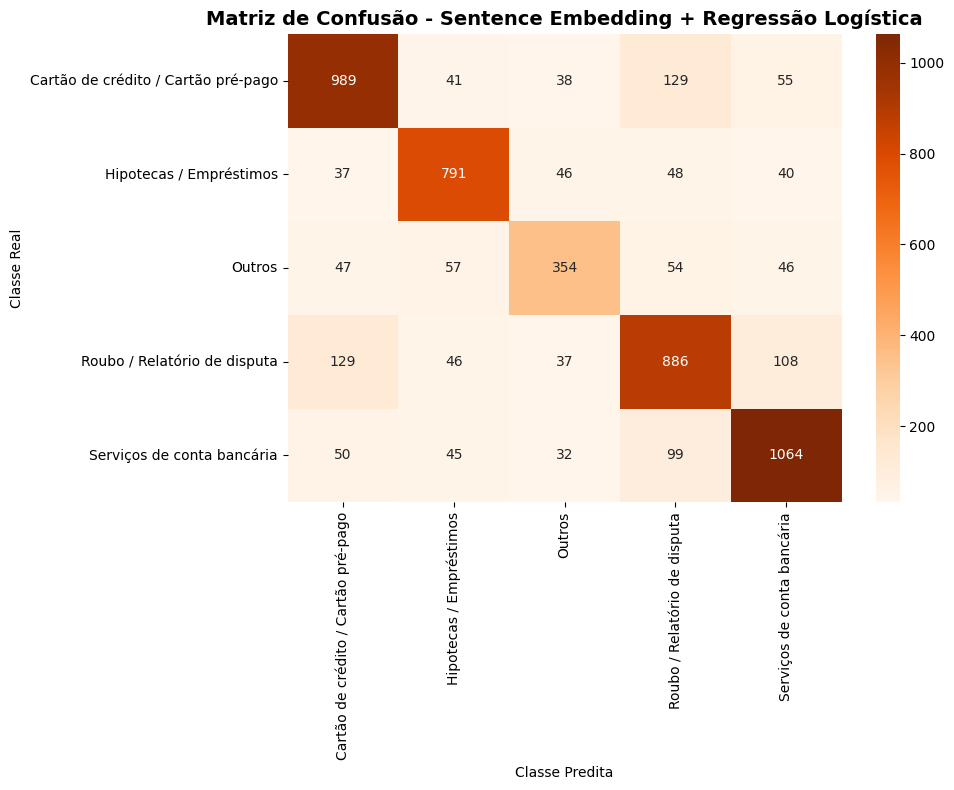

In [32]:
# Relatório de classificação
print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 3")
print("="*80)
print(classification_report(y_test, y_pred_emb))

# Matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_emb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid_search_emb.classes_, 
            yticklabels=grid_search_emb.classes_,
            ax=ax)
ax.set_title('Matriz de Confusão - Sentence Embedding + Regressão Logística', fontsize=14, fontweight='bold')
ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')
plt.tight_layout()
plt.show()

## Comparação dos Modelos e Seleção do Campeão

As classes são próximas e o objetivo é maximizar equilíbrio entre precision e recall: F1-macro

Uso de 5-fold CV no treino garante robustez antes do teste final.

**Critério de seleção:**
- Melhor F1-Score (weighted) no teste ≥ 0.75
- Em caso de empate: escolher modelo mais simples e leve (produção)


In [33]:
print("="*80)
print("COMPARAÇÃO DOS MODELOS")
print("="*80)

# Consolidar resultados em DataFrame
comparacao = pd.DataFrame([
    {
        'Modelo': results_exp1['model'],
        'F1-Score CV (média)': f"{results_exp1['f1_cv']:.4f}",
        'F1-Score Teste': f"{results_exp1['f1_test']:.4f}",
        'Accuracy Teste': f"{results_exp1['accuracy_test']:.4f}",
        'Tempo Treino (s)': f"{results_exp1['train_time']:.2f}"
    },
    {
        'Modelo': results_exp2['model'],
        'F1-Score CV (média)': f"{results_exp2['f1_cv']:.4f}",
        'F1-Score Teste': f"{results_exp2['f1_test']:.4f}",
        'Accuracy Teste': f"{results_exp2['accuracy_test']:.4f}",
        'Tempo Treino (s)': f"{results_exp2['train_time']:.2f}"
    },
    {
        'Modelo': results_exp3['model'],
        'F1-Score CV (média)': f"{results_exp3['f1_cv']:.4f}",
        'F1-Score Teste': f"{results_exp3['f1_test']:.4f}",
        'Accuracy Teste': f"{results_exp3['accuracy_test']:.4f}",
        'Tempo Treino (s)': f"{results_exp3['train_time']:.2f}"
    }
])

print("\n", comparacao.to_string(index=False))

# Determinar o campeão
f1_scores = [results_exp1['f1_test'], results_exp2['f1_test'], results_exp3['f1_test']]
best_idx = np.argmax(f1_scores)
experiments = [results_exp1, results_exp2, results_exp3]
champion = experiments[best_idx]

print("\n" + "="*80)
print("🏆 MODELO CAMPEÃO")
print("="*80)
print(f"\nModelo: {champion['model']}")
print(f"F1-Score (Teste): {champion['f1_test']:.4f}")
print(f"Accuracy (Teste): {champion['accuracy_test']:.4f}")
print(f"F1-Score (CV): {champion['f1_cv']:.4f}")

if champion['f1_test'] >= 0.75:
    print(f"\n✓ Meta atingida! F1-Score > 0.75")
else:
    print(f"\n⚠ Meta não atingida. F1-Score < 0.75")


COMPARAÇÃO DOS MODELOS

                                   Modelo F1-Score CV (média) F1-Score Teste Accuracy Teste Tempo Treino (s)
            TF-IDF + Regressão Logística              0.9097         0.9132         0.9134           994.20
                     TF-IDF + Linear SVM              0.9065         0.9102         0.9104           897.37
Sentence Embedding + Regressão Logística              0.7731         0.7746         0.7752            46.87

🏆 MODELO CAMPEÃO

Modelo: TF-IDF + Regressão Logística
F1-Score (Teste): 0.9132
Accuracy (Teste): 0.9134
F1-Score (CV): 0.9097

✓ Meta atingida! F1-Score > 0.75


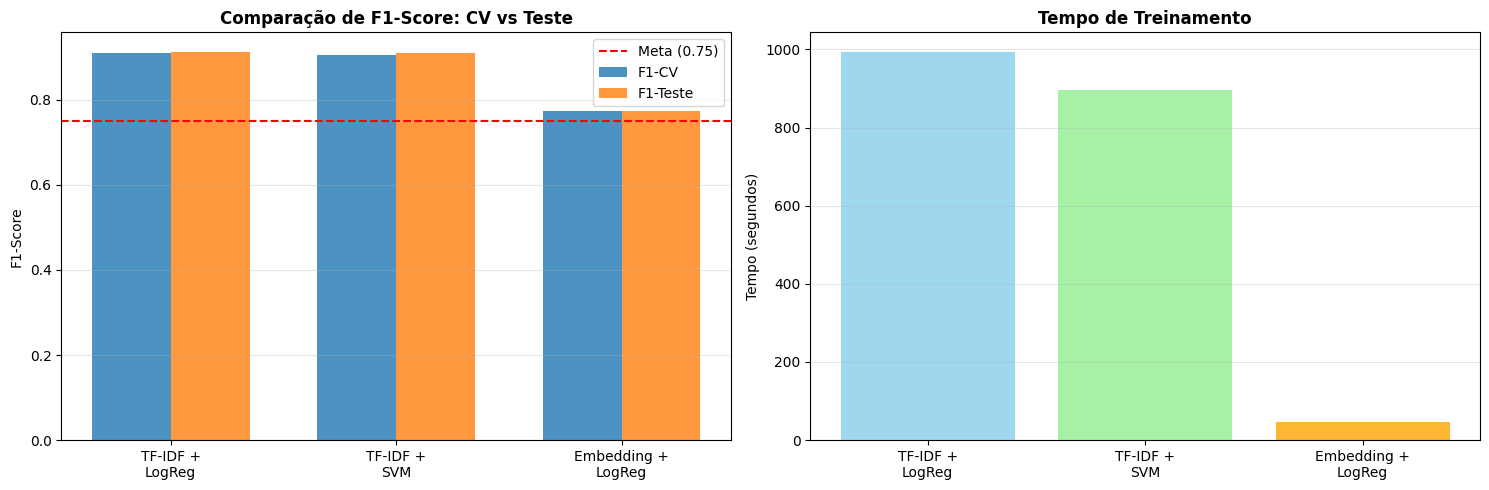

In [34]:
# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# F1-Score Teste
modelos = ['TF-IDF +\nLogReg', 'TF-IDF +\nSVM', 'Embedding +\nLogReg']
f1_cv_scores = [results_exp1['f1_cv'], results_exp2['f1_cv'], results_exp3['f1_cv']]
f1_test_scores = [results_exp1['f1_test'], results_exp2['f1_test'], results_exp3['f1_test']]

x_pos = np.arange(len(modelos))
width = 0.35

axes[0].bar(x_pos - width/2, f1_cv_scores, width, label='F1-CV', alpha=0.8)
axes[0].bar(x_pos + width/2, f1_test_scores, width, label='F1-Teste', alpha=0.8)
axes[0].axhline(y=0.75, color='r', linestyle='--', label='Meta (0.75)')
axes[0].set_ylabel('F1-Score')
axes[0].set_title('Comparação de F1-Score: CV vs Teste', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(modelos)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Tempo de Treinamento
tempos = [results_exp1['train_time'], results_exp2['train_time'], results_exp3['train_time']]
axes[1].bar(modelos, tempos, color=['skyblue', 'lightgreen', 'orange'], alpha=0.8)
axes[1].set_ylabel('Tempo (segundos)')
axes[1].set_title('Tempo de Treinamento', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### **Validação do professor**

Consolidar apenas os scripts do seu **modelo campeão**, desde o carregamento do dataframe, separação das amostras, tratamentos utilizados (funções, limpezas, etc.), criação dos objetos de vetorização dos textos e modelo treinado e outras implementações utilizadas no processo de desenvolvimento do modelo.

O modelo precisar atingir um score na métrica F1 Score superior a 75%.

**Atenção:**
- **Implemente aqui apenas os scripts que fazem parte do modelo campeão.**
- **Execute o pipeline do modelo campeão completamente para garantir que não tetá erros no script.**


In [1]:
# 1. BÁSICOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
warnings.filterwarnings('ignore')

# 2. NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import spacy

# 3. SKLEARN - MODELOS E MÉTRICAS
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, 
    confusion_matrix, precision_score, recall_score
)

# 4. PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


# 6. DOWNLOADS NLTK
nltk.download('stopwords', quiet=True)
nltk.download('rslp', quiet=True)
nltk.download('punkt', quiet=True)

# 7. SPAcy
try:
    nlp = spacy.load('pt_core_news_sm', disable=["parser", "ner"])
    nlp.max_length = 2_000_000
    print("✓ Modelo spaCy otimizado carregado!")
except:
    print("⚠ Modelo spaCy não encontrado. Execute: python -m spacy download pt_core_news_sm")
    nlp = None

✓ Modelo spaCy otimizado carregado!


In [2]:
df = pd.read_csv('tickets_reclamacoes_classificados.csv', delimiter = ';')

In [3]:
# Stopwords customizadas
custom_stopwords = [
    'cliente', 'favor', 'gostaria', 'solicito', 'peço', 'preciso',
    'reclamação', 'reclamações', 'problema', 'problemas',
    'situação', 'situações', 'caso', 'casos',
    'informação', 'informações', 'dados', 'dado',
    'atendimento', 'atendimentos', 'contato', 'contatos',
    'serviço', 'serviços'
]

# Adicionar stopwords em inglês leve
stopwords_en_light = ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']

# Combinar todas as stopwords em uma LISTA
stop_words_pt = list(stopwords.words('portuguese')) + custom_stopwords + stopwords_en_light

# Converter para lista única (remover duplicatas)
stop_words_pt = list(set(stop_words_pt))

In [4]:
def clean_text(text):
    """
    Remove tokens mascarados específicos do domínio financeiro
    
    Parâmetros:
    - text: texto a ser limpo
    
    Retorna:
    - texto limpo sem tokens mascarados
    """
    if not isinstance(text, str):
        return ""
    
    # Converter para lowercase
    text = text.lower()
    
    # Remover tokens mascarados
    text = re.sub(r'\b[xX]{2,}\b', '', text)  # Remove xxxx, xx
    text = re.sub(r'\b\d{2,}\b', '', text)     # Remove 00, 2020, etc.
    
    # Limpar espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# IMPLEMENTAÇÃO: Lematização otimizada para performance
import spacy

# 1) Carregar spaCy otimizado
try:
    nlp = spacy.load("pt_core_news_sm", disable=["parser", "ner"])  # só POS + lemmatização
    nlp.max_length = 2_000_000  # folga para textos maiores
    print("✓ Modelo spaCy otimizado carregado!")
except:
    print("⚠ Modelo spaCy não encontrado. Execute: python -m spacy download pt_core_news_sm")
    nlp = None

# 2) Lematização em lote otimizada
def lemmatize_text_batch(texts, keep_pos=("NOUN", "VERB", "ADJ"), batch_size=300, n_process=-1):
    """
    Lematização otimizada para grandes volumes de texto
    """
    if nlp is None:
        return texts

    sw = stop_words_pt if isinstance(stop_words_pt, set) else set(stop_words_pt)
    single = isinstance(texts, str)
    if single:
        texts = [texts]

    out = []
    with nlp.select_pipes(disable=[]):  # já desativamos parser/ner no load
        for doc in nlp.pipe(texts, batch_size=batch_size, n_process=n_process):
            lemmas = [
                t.lemma_ for t in doc
                if t.pos_ in keep_pos and len(t.lemma_) > 2 and t.lemma_ not in sw
            ]
            out.append(" ".join(lemmas))

    return out[0] if single else out

# 3) Pré-processador vetorizado
def preprocess_text_series(texts, use_lemmatization=True):
    """
    Pré-processamento otimizado para Series do pandas
    """
    texts = texts.fillna("").astype(str)
    texts = texts.map(clean_text)  
    
    if not use_lemmatization:
        sw = stop_words_pt if isinstance(stop_words_pt, set) else set(stop_words_pt)
        return texts.map(lambda t: " ".join(w for w in t.split() if len(w) > 2 and w not in sw))
    
    return pd.Series(lemmatize_text_batch(texts, batch_size=300, n_process=-1), index=texts.index)

✓ Modelo spaCy otimizado carregado!


In [5]:

from sklearn.model_selection import train_test_split


X = df['descricao_reclamacao']
y = df['categoria']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribuição de classes no treino:")
print(y_train.value_counts())

Conjunto de Treino: 15804 amostras (75.0%)
Conjunto de Teste: 5268 amostras (25.0%)

Distribuição de classes no treino:
categoria
Serviços de conta bancária             3871
Cartão de crédito / Cartão pré-pago    3754
Roubo / Relatório de disputa           3616
Hipotecas / Empréstimos                2888
Outros                                 1675
Name: count, dtype: int64


In [6]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


print("="*80)
print("EXPERIMENTO 1: TF-IDF + REGRESSÃO LOGÍSTICA")
print("="*80)

# Pré-processar os textos (aplicar lematização)
print("\n[1/5] Pré-processando textos...")
X_train_processed = preprocess_text_series(X_train, use_lemmatization=True)
X_test_processed = preprocess_text_series(X_test, use_lemmatization=True)
print(f"✓ Processados {len(X_train_processed)} textos de treino e {len(X_test_processed)} de teste")

# Definir o pipeline
print("\n[2/5] Configurando pipeline e Grid Search...")
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Grid de hiperparâmetros
param_grid_lr = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_df': [1, 2, 3],
    'clf__C': [0.5, 1, 2, 4]
}

# GridSearchCV com 5-fold estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Treinamento
print("\n[3/5] Treinando modelo com GridSearchCV (5-fold)...")
start_time = time.time()
grid_search_lr.fit(X_train_processed, y_train)
train_time = time.time() - start_time

print(f"✓ Treinamento concluído em {train_time:.2f} segundos")

# Melhores hiperparâmetros
print("\n[4/5] Melhores hiperparâmetros encontrados:")
for param, value in grid_search_lr.best_params_.items():
    print(f"  - {param}: {value}")

# Avaliação no conjunto de teste
print("\n[5/5] Avaliação no conjunto de teste...")
y_pred_lr = grid_search_lr.predict(X_test_processed)
f1_test_lr = f1_score(y_test, y_pred_lr, average='weighted')
accuracy_test_lr = accuracy_score(y_test, y_pred_lr)

print(f"\nResultados no Teste:")
print(f"  - F1-Score (weighted): {f1_test_lr:.4f}")
print(f"  - Accuracy: {accuracy_test_lr:.4f}")
print(f"  - Tempo de treinamento: {train_time:.2f}s")

# Armazenar resultados
results_exp1 = {
    'model': 'TF-IDF + Regressão Logística',
    'best_params': grid_search_lr.best_params_,
    'f1_cv': grid_search_lr.best_score_,
    'f1_test': f1_test_lr,
    'accuracy_test': accuracy_test_lr,
    'train_time': train_time,
    'grid_search': grid_search_lr
}

EXPERIMENTO 1: TF-IDF + REGRESSÃO LOGÍSTICA

[1/5] Pré-processando textos...
✓ Processados 15804 textos de treino e 5268 de teste

[2/5] Configurando pipeline e Grid Search...

[3/5] Treinando modelo com GridSearchCV (5-fold)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✓ Treinamento concluído em 1481.98 segundos

[4/5] Melhores hiperparâmetros encontrados:
  - clf__C: 4
  - tfidf__min_df: 3
  - tfidf__ngram_range: (1, 2)
  - tfidf__sublinear_tf: False

[5/5] Avaliação no conjunto de teste...

Resultados no Teste:
  - F1-Score (weighted): 0.9128
  - Accuracy: 0.9131
  - Tempo de treinamento: 1481.98s


In [7]:
print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 1")
print("="*80)
print(classification_report(y_test, y_pred_lr))

# Matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_lr.classes_, 
            yticklabels=grid_search_lr.classes_,
            ax=ax)
ax.set_title('Matriz de Confusão - TF-IDF + Regressão Logística', fontsize=14, fontweight='bold')
ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')
plt.tight_layout()
plt.show()


RELATÓRIO DE CLASSIFICAÇÃO - EXPERIMENTO 1
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.91      0.93      0.92      1252
            Hipotecas / Empréstimos       0.92      0.92      0.92       962
                             Outros       0.91      0.84      0.87       558
       Roubo / Relatório de disputa       0.90      0.89      0.90      1206
         Serviços de conta bancária       0.92      0.94      0.93      1290

                           accuracy                           0.91      5268
                          macro avg       0.91      0.90      0.91      5268
                       weighted avg       0.91      0.91      0.91      5268



In [8]:
print(f"\n{'='*80}")
print("EXEMPLOS DE PREDIÇÕES (10 CASOS DO CONJUNTO DE TESTE)")
print(f"{'='*80}\n")


sample_indices = np.random.choice(X_test_processed.index, size=min(10, len(X_test_processed)), replace=False)

for idx, test_idx in enumerate(sample_indices, 1):
    texto_original = X_test.loc[test_idx]  
    classe_real = y_test.loc[test_idx]     
    
    # Para TF-IDF, usar texto processado
    texto_processado = X_test_processed.loc[test_idx]  
    classe_predita = grid_search_lr.predict([texto_processado])[0]  
    
    correto = "✓" if classe_real == classe_predita else "✗"
    
    print(f"[{idx}] {correto}")
    print(f"  Texto: {texto_original[:100]}...")
    print(f"  Real: {classe_real}")
    print(f"  Predito: {classe_predita}")


EXEMPLOS DE PREDIÇÕES (10 CASOS DO CONJUNTO DE TESTE)

[1] ✓
  Texto: J.P. Morgan Mortgage XXXX XXXX XXXX XXXX XXXX XXXX XXXX / XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XX...
  Real: Hipotecas / Empréstimos
  Predito: Hipotecas / Empréstimos
[2] ✗
  Texto: O JP Morgan Chase mentiu descaradamente para a Agência de Finanças do Consumidor/Comissão Federal de...
  Real: Cartão de crédito / Cartão pré-pago
  Predito: Roubo / Relatório de disputa
[3] ✓
  Texto: Eu tinha saldos promocionais xxxx 0 % - xxxx expirado xxxx/xxxx/17 O outro expira xxxx/xxxx/17. Em x...
  Real: Outros
  Predito: Outros
[4] ✓
  Texto: Recebi uma chamada de xxxx xxxx xxxx, xxxx. Xxxx xxxx, xxxx xxxx, il xxxx.
Lá, o número de telefone...
  Real: Serviços de conta bancária
  Predito: Serviços de conta bancária
[5] ✗
  Texto: Eu sou um cliente fiel do Chase Bank desde xxxx. Em xxxx, abri uma conta de cartão de crédito com el...
  Real: Roubo / Relatório de disputa
  Predito: Cartão de crédito / Cartão pré-pago
[6] ✓
  T